In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [260]:
nh = pd.read_csv('../../data/cases_nh.csv')

In [261]:
nh.shape

(1282, 5)

In [262]:
nh.head()

,file name,title,type,decision,text
0,Tarbl099.pdf,"TARBELL ADMINISTRATOR, INC., TRUSTEE OF THE TA...",Non-Criminal,Affirmed in part; reversed in part; and remanded.,"[""NOTICE: This opinion is subject to motions f..."
1,sider051.pdf,THE STATE OF NEW HAMPSHIRE v. GEORGE SIDERIS,Non-Criminal,vacated; and remanded.,"[""NOTICE: This opinion is subject to motions f..."
2,danie080.pdf,RYDER DANIELS & a. v. TOWN OF LONDONDERRY & a.,Non-Criminal,Affirmed.,"[""NOTICE: This opinion is subject to motions f..."
3,macdo019.pdf,THE STATE OF NEW HAMPSHIRE v. DAVID A. MACDONALD,Non-Criminal,Affirmed.,"[""NOTICE: This opinion is subject to motions f..."
4,liber139.pdf,LIBERTARIAN PARTY OF NEW HAMPSHIRE v. SECRETAR...,Non-Criminal,Dismissed.,"[""NOTICE: This opinion is subject to motions f..."


In [263]:
nh.type.unique() 

array(['Non-Criminal', 'Criminal', nan], dtype=object)

In [264]:
criminal = nh[nh['type']=='Criminal']   # there are 269 criminal cases in NH data
criminal.shape   

(269, 5)

In [265]:
criminal.decision.unique()             

array(['in part; and remanded.', 'Affirmed.',
       'Affirmed in part; reversed in part; and remanded.',
       'Reversed and remanded.', 'Reversed.',
       'Sentence vacated and remanded.', 'Vacated and remanded.',
       'Affirmed in part; reversed in part; remanded.',
       'Affirmed in part; vacated in part; remanded.', 'Remanded.',
       'Affirmed in part and vacated', 'remanded.', 'part; and remanded.',
       'Affirmed in part; and reversed', 'vacated; and remanded.',
       'Sentence vacated; remanded', 'reversed in part.',
       'vacated in part.', 'reversed; and remanded.',
       'part; remanded for', 'and reversed in part.',
       'Affirmed in part and reversed in part.',
       'vacated; and remanded for', 'Affirmed and remanded.'],
      dtype=object)

In [266]:
criminal.decision = criminal.decision.str.lower().copy()
part =  criminal[criminal.decision.str.contains('part')]
part.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(25, 5)

In [267]:
no_part = criminal[~criminal.decision.str.contains('part')]
no_part.shape

(244, 5)

In [268]:
affirmed = no_part[no_part.decision.str.contains('affirm')]
affirmed

,file name,title,type,decision,text
8,labra011.pdf,THE STATE OF NEW HAMPSHIRE v. MICHAEL J. LABRA...,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
10,jenot137.pdf,THE STATE OF NEW HAMPSHIRE v. DOUGLAS JENOT,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
17,munoz039.pdf,THE STATE OF NEW HAMPSHIRE v. PETER MUNOZ,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
35,jense129.pdf,THE STATE OF NEW HAMPSHIRE v. GRAHAM JENSEN,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
42,burge012.pdf,THE STATE OF NEW HAMPSHIRE v. JOHN BURGESS,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
...,...,...,...,...,...
1257,2018074labrie.pdf,THE STATE OF NEW HAMPSHIRE v. OWEN LABRIE,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
1260,2018015bazinet.pdf,THE STATE OF NEW HAMPSHIRE v. JAMES BAZINET,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
1264,2018079bjorkman.pdf,THE STATE OF NEW HAMPSHIRE v. HJALMAR BJORKMAN,Criminal,affirmed.,"[""NOTICE: This opinion is subject to motions f..."
1274,2018062afshar.pdf,THE STATE OF NEW HAMPSHIRE v. FOAD AFSHAR,Criminal,affirmed and remanded.,"[""NOTICE: This opinion is subject to motions f..."


In [269]:
reversed = no_part[~no_part.decision.str.contains('affirm')]
reversed.shape

(50, 5)

In [270]:

#affirmed = criminal[criminal.decision=='Affirmed.']   # separate the affirmed, reversed, partial reversed cases
#reversed = criminal[criminal.decision=='Reversed.']
#partial_reversed = criminal[criminal.decision!='Affirmed.'][criminal.decision!='Reversed.']

The proportion of affirmed cases is 71.4%, the proportion of reversed cases is 3.3%, the proportion of partial reversed cases is 25.3.

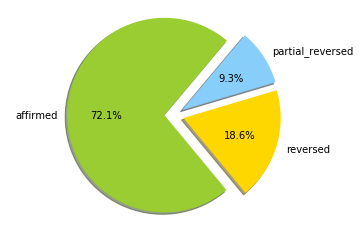

In [271]:
labels='affirmed','reversed','partial_reversed'
sizes= (len(affirmed)/len(criminal))*100,(len(reversed)/len(criminal))*100,(len(part)/len(criminal))*100
colors='yellowgreen','gold','lightskyblue'
explode=0.1,0.1,0.1
plt.pie(x=sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,labeldistance=1.1,startangle=50,radius=1,counterclock=True)
plt.axis('equal')
plt.show()

In [272]:

informant = criminal[criminal.text.str.contains('informant')]
non_informant =  criminal[~criminal.text.str.contains('informant')]

In [273]:
informant.shape

(15, 5)

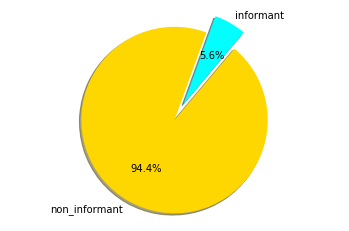

In [274]:
labels='informant','non_informant'
sizes= (len(informant)/len(criminal))*100,(len(non_informant)/len(criminal))*100
colors='aqua','gold'
explode=0.1,0.1
plt.pie(x=sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,labeldistance=1.1,startangle=50,radius=1,counterclock=True)
plt.axis('equal')
plt.show()

There are some common features in affirmed and reversed, like 'case','court','new hampshire', this words appear many times, but it doesn't make senses. So we delete these words. Meanwhile, there are many numbers in the case. The numbers usually appear in two places: the case number and the law number. We can't tell where the numbers come from. So we delete the number.

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [276]:
def tfidf(X,n):
    vectorizer = TfidfVectorizer(stop_words='english',max_features=n)
    tfidf = vectorizer.fit_transform(X)
    word = vectorizer.get_feature_names()
    return word

In [277]:
criminal_common_word = tfidf(criminal['text'],20)
criminal_common_word

['argues',
 'case',
 'counsel',
 'court',
 'defendant',
 'did',
 'evidence',
 'hampshire',
 'id',
 'jury',
 'new',
 'omitted',
 'police',
 'rsa',
 'rule',
 'state',
 'statute',
 'testimony',
 'trial',
 'victim']

In [278]:
import re
def clean_common_word(text):           # delect the number, punctuation and criminal_word
    text = re.sub("[\s+\.\!\/_,$%^*()+\"\'\[\]]+|[+——！，。？、~@#￥%……&*（）:;]+", " ", text)  # remove punctuation
    #text =  re.sub("[\s+\.\!\/_,$%^*()+\"\'\[\]]+|[+——！，。？、~@#￥%……&*（）:;]+", " ", text) 
    #text = re.sub(r'[{}]+'.format(punctuation),'',text)
    text = re.sub("[1234567890]", "", text)  # remove punctuation
    words=text.lower().split()          # lower case
    words=[ w for w in words if w not in criminal_common_word]
    #','.join('abc')-----'a,b,c'
    return " ".join(words)


# analyze the affirmed cases and reversed cases

In [279]:
def handle_all_cases(df):
    for i in range(len(df)):
        df.text.iloc[i] = clean_common_word(df.text.iloc[i])
    return df

In [280]:
reversed = handle_all_cases(reversed)
affirmed = handle_all_cases(affirmed)
criminal = handle_all_cases(criminal)
part = handle_all_cases(part)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [241]:
reversed_word = tfidf(reversed['text'],10)     # select the most important 10 features
reversed_word

['assault',
 'child',
 'conduct',
 'court',
 'defendant',
 'defense',
 'force',
 'officers',
 'person',
 'sexual']

In [242]:
affirmed_word = tfidf(affirmed['text'],10)
affirmed_word

['court',
 'defendant',
 'defense',
 'error',
 'opinion',
 'person',
 'quotation',
 'reasonable',
 'testified',
 'time']

In [243]:
criminal_word = tfidf(criminal['text'],10)
criminal_word

['assault',
 'court',
 'defendant',
 'defense',
 'error',
 'law',
 'person',
 'quotation',
 'reasonable',
 'time']

In [244]:
part_word = tfidf(part['text'],10)
part_word

['assault',
 'charge',
 'conclude',
 'court',
 'criminal',
 'defendant',
 'error',
 'instruction',
 'law',
 'reasonable']

When we select the most import 15 features in reversed cases and affirmed cases, we found reversed cases contains features: child and sexual. 

# analyze the cases with informant and without

In [245]:
non_informant = handle_all_cases(non_informant)
informant = handle_all_cases(informant)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [246]:
non_informant_word = tfidf(non_informant['text'],10)
non_informant_word

['assault',
 'court',
 'defendant',
 'defense',
 'error',
 'law',
 'person',
 'quotation',
 'reasonable',
 'time']

In [247]:
informant_word = tfidf(informant['text'],10)
informant_word

['constitution',
 'defendant',
 'home',
 'informant',
 'information',
 'reasonable',
 'search',
 'statements',
 'warrant',
 'witness']

# reversed cases with informant

In [32]:
informant_in_reverse = reversed[reversed.text.str.contains('informant')]
non_informant_in_reverse =  reversed[~reversed.text.str.contains('informant')]

In [33]:
informant_in_reverse

,file name,title,type,decision,text
211,robin076.pdf,THE STATE OF NEW HAMPSHIRE v. SCOTT ROBINSON,Criminal,reversed and remanded.,[ notice: this opinion is subject to motions f...
335,2010042nieve.pdf,THE STATE OF NEW HAMPSHIRE v. SOILUIS NIEVES,Criminal,reversed and remanded.,[ notice: this opinion is subject to motions f...
349,2010039parke.pdf,2008-886 THE STATE OF NEW HAMPSHIRE v. ANTHONY...,Criminal,reversed and remanded.,[ notice: this opinion is subject to motions f...


In [34]:
non_info_r_word = tfidf(non_informant_in_reverse['text'],10)
non_info_r_word

['child',
 'conduct',
 'court',
 'defendant',
 'defense',
 'force',
 'officers',
 'omitted',
 'person',
 'sexual']

In [35]:
info_r_word = tfidf(informant_in_reverse['text'],10)
info_r_word

['circumstances',
 'defendant',
 'detective',
 'home',
 'officer',
 'officers',
 'promise',
 'requirement',
 'search',
 'warrant']

The reversed cases with informant is not related to child and sexual. 

# affirmed cases with informant

In [36]:
informant_in_affirmed = affirmed[affirmed.text.str.contains('informant')]
non_informant_in_affirmed =  affirmed[~affirmed.text.str.contains('informant')]

In [37]:
info_a_word = tfidf(informant_in_affirmed['text'],10)
info_a_word

['constitution',
 'crime',
 'defendant',
 'informant',
 'information',
 'instruction',
 'murder',
 'reasonable',
 'statements',
 'witness']

In [38]:
non_info_a_word = tfidf(non_informant_in_affirmed['text'],10)
non_info_a_word

['court',
 'defendant',
 'defense',
 'error',
 'omitted',
 'person',
 'quotation',
 'reasonable',
 'testified',
 'time']

In affirmed cases with informant, the feature 'murder' may be important 

# similarity 

In [321]:
a = []
for i in range(len(reversed)):
    a.append(reversed.text.iloc[i].split(' '))
    

In [322]:
#a = reversed.text.iloc[24].split(' ')

In [323]:
from gensim.models import Word2Vec

In [324]:
word2vec_model =Word2Vec(a,min_count=10)


In [325]:
print(word2vec_model)

Word2Vec(vocab=2178, size=100, alpha=0.025)


In [326]:
word2vec_model.wv.most_similar('reversed')

[('dissented', 0.9956627488136292),
 ('dissenting', 0.9939828515052795),
 ('broderick', 0.9935615062713623),
 ('sullivan', 0.9934263229370117),
 ('remanded', 0.9922259449958801),
 ('concurring', 0.9913089275360107),
 ('superior', 0.9879065752029419),
 ('jj', 0.9861634969711304),
 ('william', 0.9841510057449341),
 ('conboy', 0.9825245141983032)]

In [328]:
reversed.iloc[0]

file name                                         sulli038.pdf
title        THE STATE OF NEW HAMPSHIRE v. WILLIAM JOSEPH S...
type                                                  Criminal
decision                                reversed and remanded.
text         notice this opinion is subject to motions for ...
Name: 43, dtype: object

In [335]:
b=reversed.text.iloc[0].split(' ')


In [338]:
word2vec_model1 =Word2Vec([b],min_count=1)


In [339]:
word2vec_model1.wv.most_similar('reversed')

[('meritorious', 0.6856645345687866),
 ('with', 0.6722795963287354),
 ('when', 0.6688871383666992),
 ('this', 0.6684521436691284),
 ('questions', 0.6663250923156738),
 ('very', 0.6662308573722839),
 ('no', 0.6647916436195374),
 ('also', 0.6647704839706421),
 ('n', 0.6646958589553833),
 ('we', 0.6638684272766113)]